In [3]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=c0172753ca5e902e9bf6a0d02cc953a9ad730677b6beac504915affb482e06c2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [10]:
import sys
import os
import wget

from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np


1. Підготуйте декілька зображень. Це можуть бути RGB або зображення у градаціях сірого, наприклад, у jpg форматі.

In [13]:
path_download = './tmp/downloaded'
path_target_file = os.path.join(path_download, 'pic.jpg')

# link to image
urls = [
    'https://flomaster.top/uploads/posts/2023-10/1697641426_flomaster-top-p-kubik-risunok-krasivo-13.jpg',
    'https://flomaster.top/uploads/posts/2023-10/thumbs/1697641362_flomaster-top-p-kubik-risunok-krasivo-4.jpg'
]


# for url in urls:
os.makedirs(path_download, exist_ok=True) # create if

filename = wget.download(urls[0], out=path_target_file)
print(filename)

./tmp/downloaded/pic.jpg


2. Виведіть зображення в Colab за допомогою функції imread з бібліотеки matplotlib.

(-0.5, 999.5, 1079.5, -0.5)

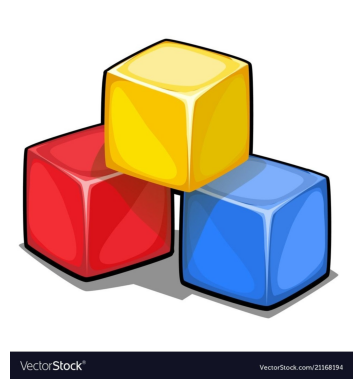

In [16]:
image_pic_gray = plt.imread(filename)

plt.imshow(np.squeeze(image_pic_gray)[:, :, :], cmap=plt.cm.gray)
plt.axis("off")


3. Визначить розмір зображення за допомогою функції shape.

In [17]:
print(
    """
    Image shape: \033[1m  {} \033[0m
    """.format(np.squeeze(image_pic_gray)[:, :, 0].shape)
)


    Image shape:   (1080, 1000) 
    


4. Оскільки SVD можна застосувати лише до 2D-даних, ми можемо або виконати його для кожного каналу кольору окремо, або ми можемо змінити форму зображення з 3D-матриці на 2D-матрицю, згладивши кожен колірний канал і склавши їх горизонтально (або вертикально).

(-0.5, 2999.5, 1079.5, -0.5)

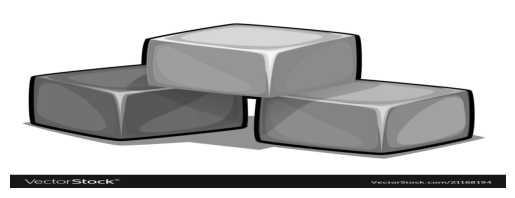

In [18]:
height, width, channels = image_pic_gray.shape
flat_image = image_pic_gray.reshape(-1, width * channels)
plt.imshow(flat_image, cmap='gray')
plt.axis("off")

5. Застосуйте SVD декомпозицію за допомогою функції svd з бібліотеки numpy.

In [19]:
U, S, Vt  = np.linalg.svd(flat_image)

6. Візуалізуйте перші k значень матриці Σ . Для цього можна використати matplotlib:

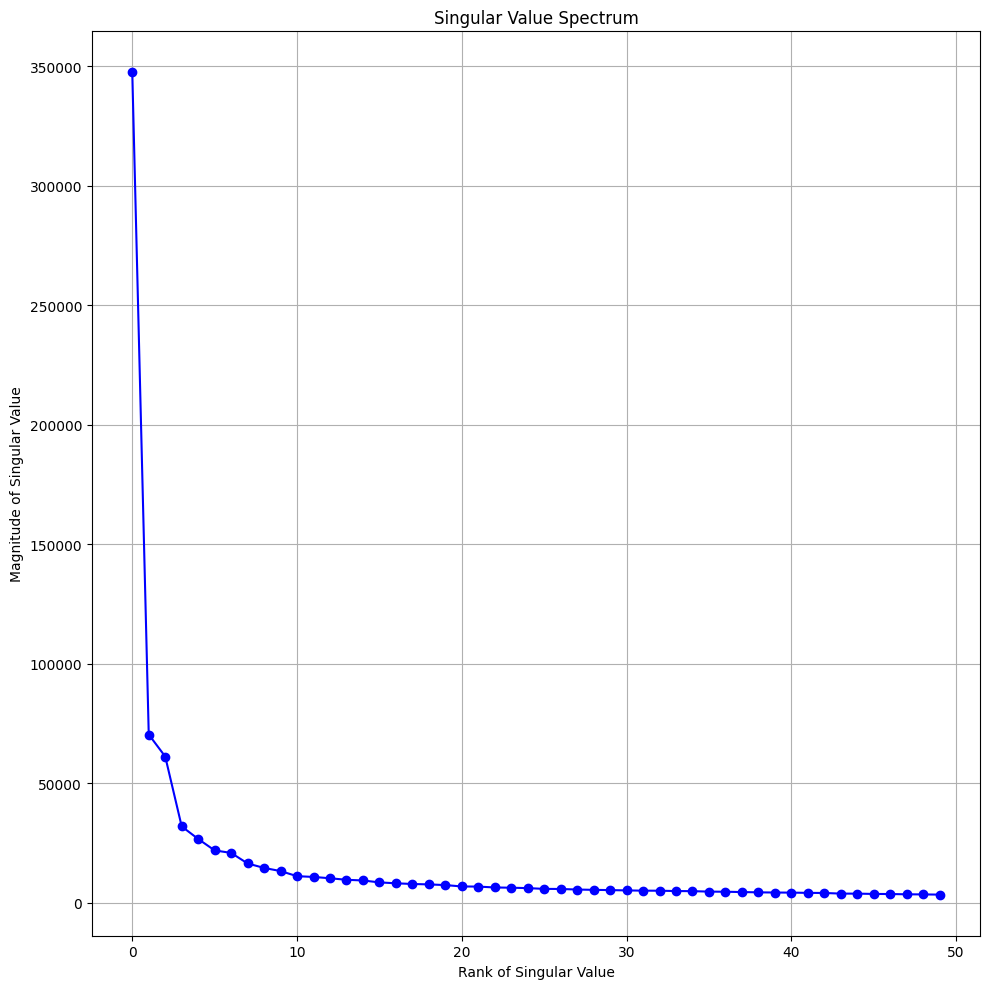

In [20]:
k = 50

plt.figure(figsize=(10, 10))
plt.plot(np.arange(k), S[:k], color='blue', marker='o', linestyle='-')
plt.title('Singular Value Spectrum')
plt.xlabel('Rank of Singular Value')
plt.ylabel('Magnitude of Singular Value')
plt.grid(True)
plt.tight_layout()
plt.show()

7. Якщо на діаграмі ми побачимо суттєве зниження значень власних чисел з матриці Σ, це буде означати, що ми можемо ефективно стиснути зображення без значної втрати точності. Наприклад, щоб скоротити зображення, яке буде відповідати першим 100 значенням можна використовувати алгоритм усіченого SVD (функція TruncatedSVD):

In [21]:
  svd = TruncatedSVD(n_components=10)
  truncated_image = svd.fit_transform(flat_image)

8. Щоб побачити, скільки інформації було втрачено під час стиснення, ми можемо виміряти помилку реконструкції зображення. Ми вимірюватимемо похибку реконструкції як середнє квадратичних похибок (MSE) між значеннями пікселів оригінального зображення та реконструйованого зображення.

У Scikit-Learn реконструйоване зображення можна отримати викликом методу inverse_transform трансформатора TruncatedSVD:

In [22]:
reconstructed_image = svd.inverse_transform(truncated_image)

In [24]:
reconstruction_error = np.mean(np.square(reconstructed_image-flat_image))

9. Щоб візуалізувати реконстуйоване зображення, нам спочатку потрібно змінити його форму в оригінальну 3D-форму, а потім обрізати значення пікселів до цілих чисел у діапазоні [0, 255]:

In [25]:
reconstructed_image = reconstructed_image.reshape(height, width, channels)

In [26]:
reconstructed_image = np.clip(reconstructed_image, 0 , 255 ).astype( 'uint8' )

In [27]:
reconstructed_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 23,  23,  24],
        [ 23,  23,  24],
        [ 23,  23,  24],
        ...,
        [ 23,  23,  24],
        [ 23,  23,  24],
        [ 23,  23,  24]],

       [[ 23,  23,  24],
        [ 23,  23,  24],
        [ 23,  23,  24],
        ...,
        [ 23,  23,  24],
        [ 23,  23,  24],
        [ 23,  23,  24]],

       [[ 23,  23,  24],
        [ 23,  23,  24],
        [ 23,  23,  24],
        ...,
        [ 23,  23,  24],
        [ 23,  23,  24],
        [ 23,  23,  24]]

In [28]:
reconstruction_error

614.9973817047736

In [29]:
reconstructed_image = reconstructed_image.reshape(height, width, channels)
reconstructed_image = np.clip(reconstructed_image, 0 , 255 ).astype( 'uint8' )


10. Виконайте експерименти із використання різних значень
k - власних чисел з матриці
Σ та візуалізуйте результати. При яких значеннях помітна втрата якості зображення?

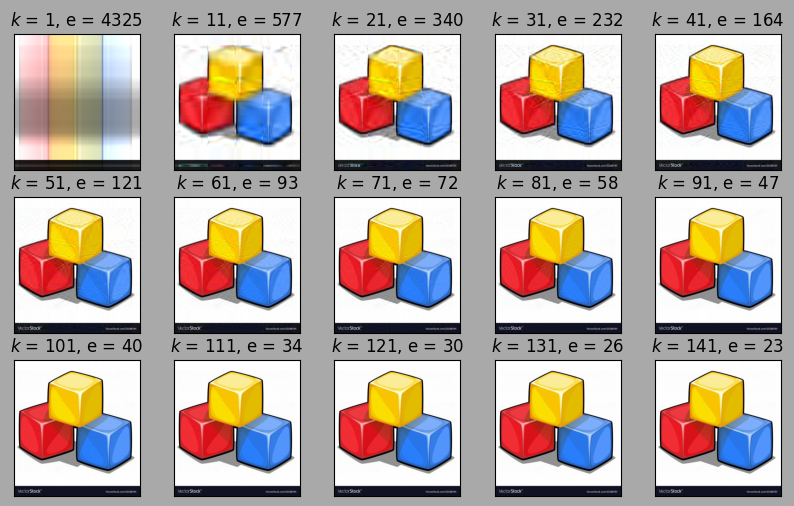

In [30]:
def  compress_image ( image, n_components = 100 ):
    # Змінити форму 3D-зображення у 2D-масив, склавши кольорові канали горизонтально
    height, width, channels = image.shape
    flat_image = image.reshape(- 1 , width * channels)

    # Обрізати зображення за допомогою SVD
    svd = TruncatedSVD(n_components=n_components)
    truncated_image = svd.fit_transform(flat_image)

    # Відновити зображення зі зменшеного представлення
    reconstructed_image = svd.inverse_transform(truncated_image)

    reconstruction_errore = np.mean(np.square(reconstructed_image-flat_image))

    # Змінити форму зображення до оригінальної 3D форми
    reconstructed_image = reconstructed_image.reshape(height, width, channels)


    # Обрізати вихідні дані до цілих чисел у діапазоні [0, 255]
    reconstructed_image = np.clip(reconstructed_image, 0 , 255 ).astype( 'uint8' )

    return reconstructed_image, reconstruction_errore

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
fig.set_facecolor('darkgray')
plt.setp(axes, xticks=[], yticks=[])  # Remove axes from the subplots

for i, k in enumerate(range(1, 150, 10)):
    row = i // 5
    col = i % 5
    # print(row, col)
    output_image, errore = compress_image(image_pic_gray, k)
    axes[row, col].imshow(output_image)
    axes[row, col].set_title(f'$k$ = {k}, e = {round(errore)}')

При К менше 61 помітна втрата якості зображення.